In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# 1. Data Loading and Initial Inspection
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/bank.csv')
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

Data Description
                age       balance           day      duration    

In [ ]:
print("Sample data")
print(data.head())

Sample data
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


Data Preprocessing

In [ ]:
# Handle missing values - for simplicity, we'll replace 'unknown' with mode (most frequent value) for categorical columns
for column in data.columns:
    if data[column].dtype == 'object' and 'unknown' in data[column].unique():
        data[column] = data[column].replace('unknown', data[column].mode()[0])


# Convert categorical features to numerical
# Ordinal encode 'education' and 'poutcome'
education_mapping = ['unknown', 'primary', 'secondary', 'tertiary']
poutcome_mapping = ['unknown', 'failure', 'other', 'success']

education_encoder = OrdinalEncoder(categories=[education_mapping])
poutcome_encoder = OrdinalEncoder(categories=[poutcome_mapping])

data['education'] = education_encoder.fit_transform(data[['education']])
data['poutcome'] = poutcome_encoder.fit_transform(data[['poutcome']])


# One-hot encode the other categorical features
categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month',]
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Convert target variable to numerical
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})


# Select features (X) and target (y)
X = data.drop('deposit', axis=1)
y = data['deposit']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nData types in X_train:")
print(X_train.dtypes)


Shape of X_train: (8929, 36)
Shape of X_test: (2233, 36)

Data types in X_train:
age                    int64
education            float64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome             float64
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
marital_married         bool
marital_single          bool
default_yes             bool
housing_yes             bool
loan_yes                bool
contact_telephone       bool
month_aug               bool
month_dec               bool
month_feb               bool
month_jan               bool
month_jul               bool
month_jun               bool
month_mar          

In [ ]:
# Model Creation
model = DecisionTreeClassifier(random_state=42)

# Model Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0) # handle 0 division

print("\nAccuracy Score:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Accuracy Score: 0.7657859381997313

Confusion Matrix:
 [[906 260]
 [263 804]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1166
           1       0.76      0.75      0.75      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



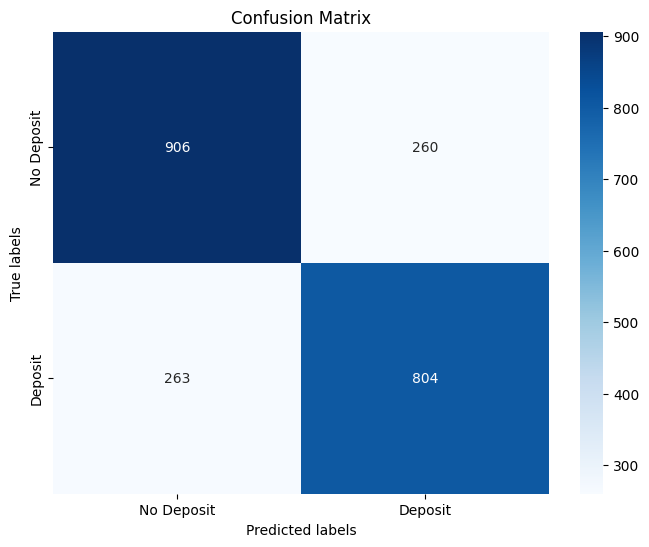

In [ ]:
# Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['No Deposit', 'Deposit'],
            yticklabels=['No Deposit', 'Deposit'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

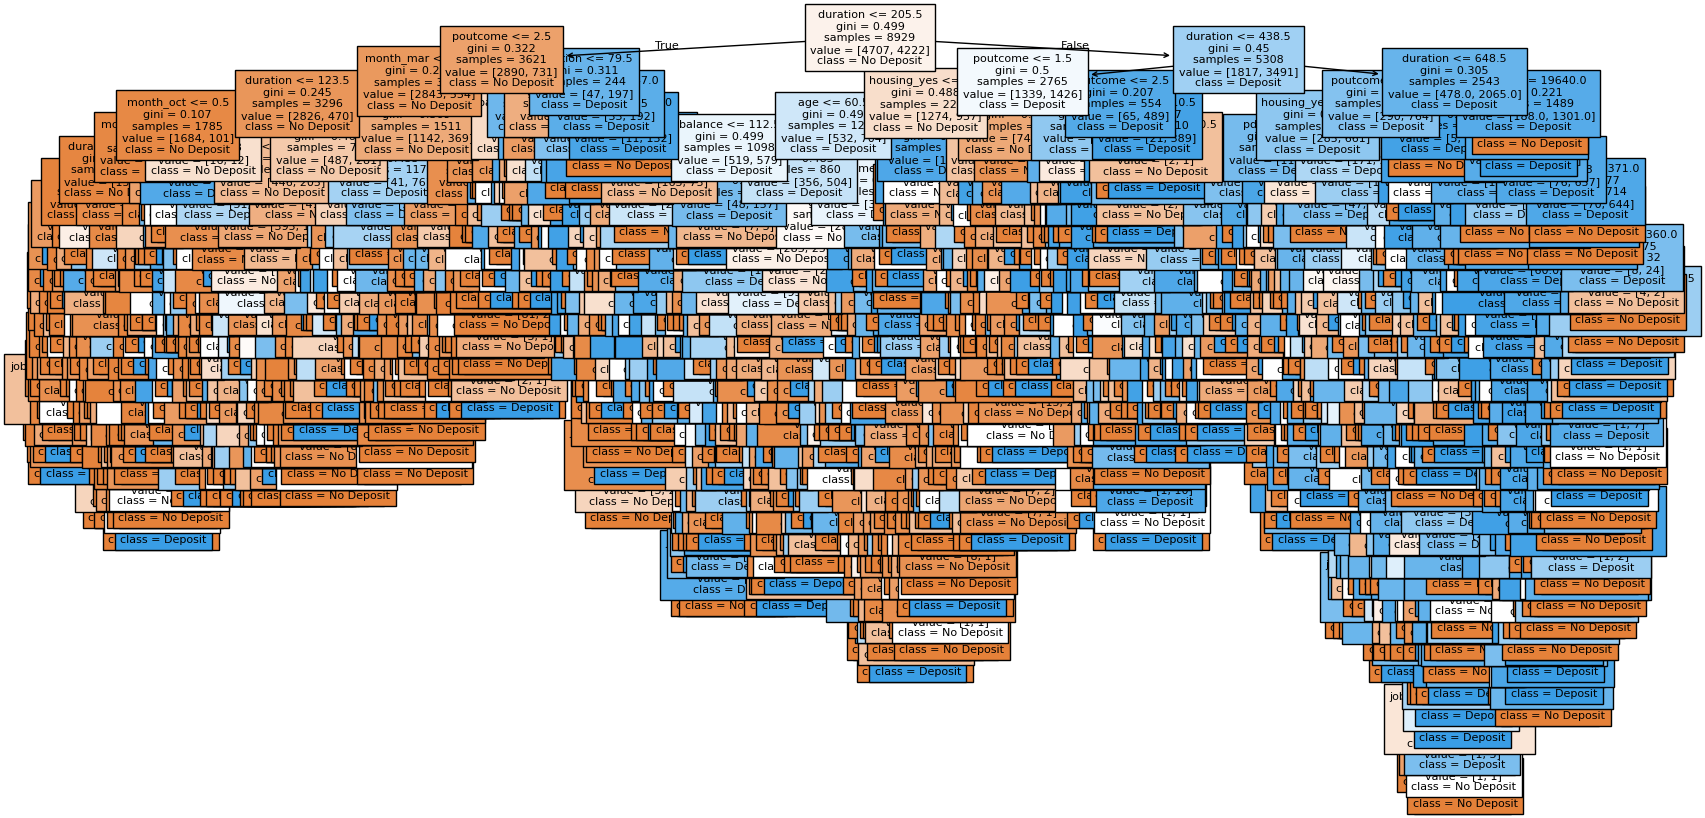

In [ ]:
# Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=X.columns,class_names=['No Deposit','Deposit'],filled = True, fontsize = 8)
plt.show()


***Insights & Stats***

Feature Importance:
              feature  importance
4            duration    0.362167
8            poutcome    0.097708
3                 day    0.087068
2             balance    0.084529
0                 age    0.078858
22        housing_yes    0.044969
6               pdays    0.033337
5            campaign    0.022211
31          month_mar    0.021358
1           education    0.014031
32          month_may    0.013501
7            previous    0.011893
34          month_oct    0.011879
29          month_jul    0.010315
12     job_management    0.009014
33          month_nov    0.008679
19    marital_married    0.008501
27          month_feb    0.007890
25          month_aug    0.006972
23           loan_yes    0.006434
20     marital_single    0.006361
30          month_jun    0.006236
9     job_blue-collar    0.005426
35          month_sep    0.005305
17     job_technician    0.005064
18     job_unemployed    0.004451
28          month_jan    0.004299
24 

<ipython-input-11-d8114c3ee1d9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y, palette = 'magma')


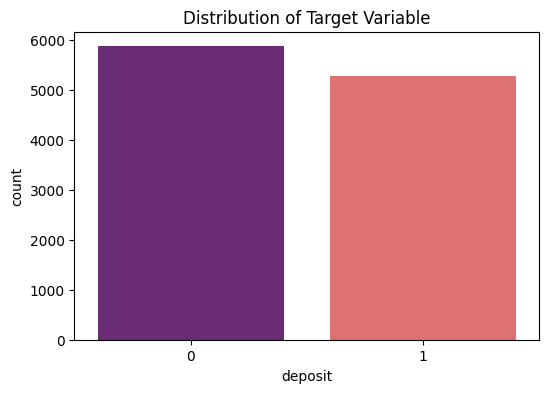


Descriptive Statistics of Numerical Features:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      

In [ ]:
# Insights and Stats
print("\n***Insights & Stats***")

#Feature importance
print("\nFeature Importance:")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

#Descriptive statistics of target variable
print("\nDescriptive Statistics of Target Variable:")
print(y.describe())

#Distribution of target variable
print("\nDistribution of Target Variable:")
plt.figure(figsize=(6,4))
sns.countplot(x = y, palette = 'magma')
plt.title("Distribution of Target Variable")
plt.show()


# Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
numerical_cols = ['age', 'balance', 'day','duration','campaign','pdays', 'previous']
print(X[numerical_cols].describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None

Data Description
                age       balance           day      duration    

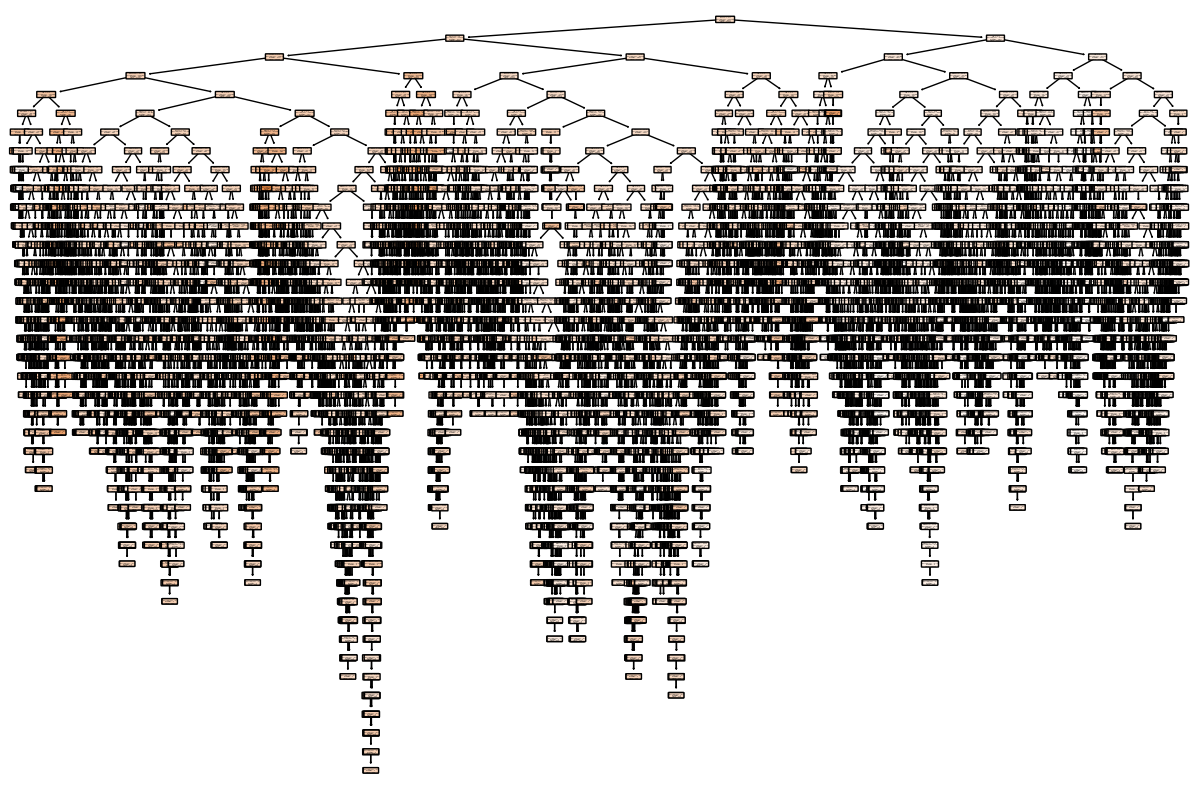

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

# 1. Data Loading and Initial Inspection
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/bank.csv')

print("\nData info")
print(data.info())

print("\nData Description")
print(data.describe())

print("Sample data")
print(data.head())

# Handle missing values - replace 'unknown' with mode for categorical columns
for column in data.columns:
    if data[column].dtype == 'object' and 'unknown' in data[column].unique():
        data[column] = data[column].replace('unknown', data[column].mode()[0])

# Convert categorical features to numerical
# Encoding categorical variables
encoder = OrdinalEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])

# Split into features (X) and target (y)
# Choose a numerical target column for regression
y = data['age']  # Example: Using 'age' as the target, change it based on your requirement
X = data.drop(columns=['age'])  # Drop the target column from features

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Decision Tree Regression Model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# 5. Model Predictions
y_pred = regressor.predict(X_test)

# 6. Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

# 7. Visualizing the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()
